In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

In [2]:
# Load and Prepare Data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create DataFrame for visualization
iris_df = X.copy()
iris_df['species'] = y.map(dict(enumerate(iris.target_names)))

##  Data Visualization

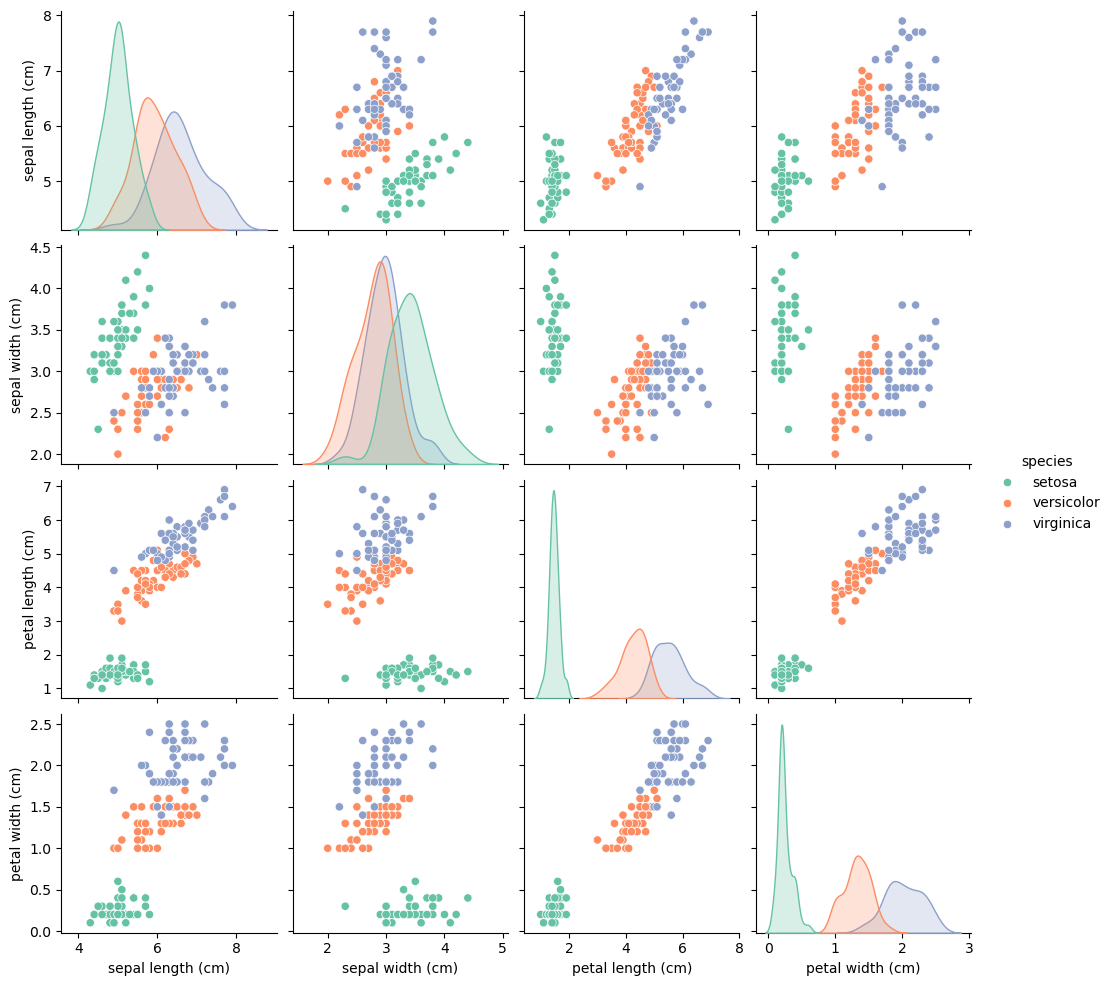

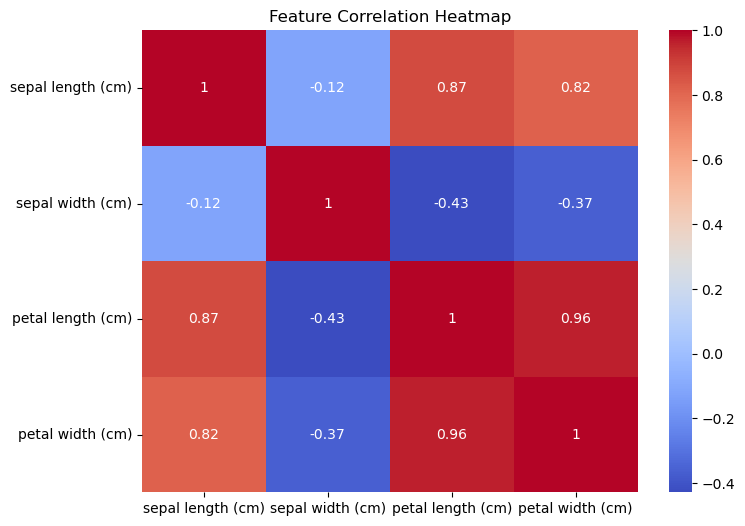

In [4]:
# Pairplot
sns.pairplot(iris_df, hue='species', palette='Set2')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

##  Model Training - Ensemble Methods

In [19]:
# Bagging
bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bag_model.fit(X_train, y_train)
bag_acc = accuracy_score(y_test, bag_model.predict(X_test))

In [21]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))

In [23]:
# Voting Classifier
log_clf = LogisticRegression(max_iter=200)
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('dt', dt_clf)], voting='hard')
voting_clf.fit(X_train, y_train)
vote_acc = accuracy_score(y_test, voting_clf.predict(X_test))


In [25]:
# Boosting Models
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
gboost = GradientBoostingClassifier(n_estimators=100, random_state=42)

models = {
    "Bagging": bag_model,
    "Random Forest": rf_model,
    "Voting": voting_clf,
    "AdaBoost": ada,
    "GradientBoost": gboost
}

In [29]:
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
models["XGBoost"] = xgboost

In [31]:
scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores[name] = accuracy_score(y_test, pred)

scores

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:02:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'Bagging': 1.0,
 'Random Forest': 1.0,
 'Voting': 1.0,
 'AdaBoost': 1.0,
 'GradientBoost': 1.0,
 'XGBoost': 1.0}

## Model Accuracy Comparison

C:\Users\hp\AppData\Local\Temp\ipykernel_15828\2295268970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette='pastel')


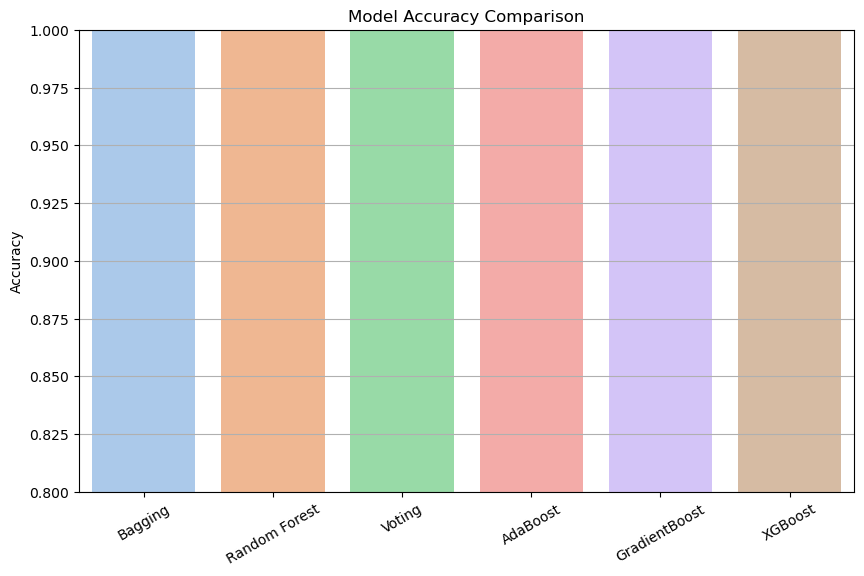

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette='pastel')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()


## PCA Visualization

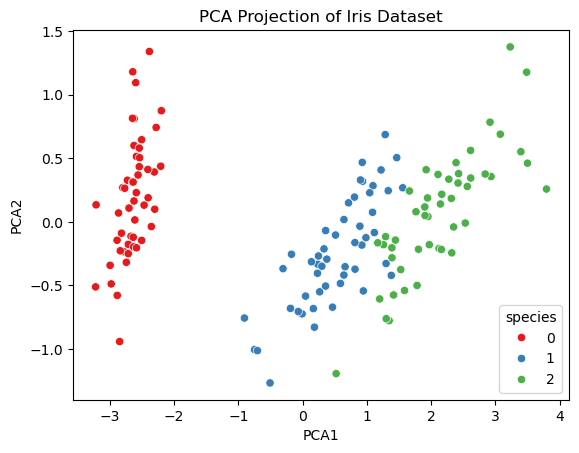

In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['species'] = y

sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='species', palette='Set1')
plt.title("PCA Projection of Iris Dataset")
plt.show()
